<h3>Linear Regression in Machine learning</h3>
Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features. When the number of the independent feature, is 1 then it is known as Univariate Linear regression, and in the case of more than one feature, it is known as multivariate linear regression.


<h3> Points to note about Linear Regression</h3>
<hr>
<ol>
    <li> <b>Purpose:</b> Predict the value of a dependent variable based on one or more independent variables.</li>
<li> <b>Model:</b> Assumes a linear relationship between variables.</li>
<li> <b>Objective:</b> Minimize the sum of squared differences between predicted and actual values.</li>
<li> <b>Equation:</b> y=mx+b (for simple linear regression)
y=b0+b1x1+b2x2+...+bnxn (for multiple linear regression).</li>
<li> <b>Parameters:</b> Coefficients (slopes) and intercept determine the line of best fit.</li>
<li> <b>Evaluation:</b> Commonly assessed using metrics like Mean Squared Error (MSE) or R-squared.</li>
<li> <b>Assumptions:</b> Assumes linearity, independence, homoscedasticity, and normality of errors.</li>
<li> <b>Applications:</b> Used in predicting outcomes, trend analysis, and understanding relationships between variables.</li>
</ol>

<h3> Line of Best Fit</h3>
<p>The main goal of linear regression is to find the best fitting lines which to reduces the error between predicted value and actual value.
Best fit line minimizes the error.
</p>
<h3> Cost Function of Linear Regression </h3>
<p><b>Cost Function: </b> It calculates the differece between predicted value and actual value. This also known as loss function. MSE(Mean Square Error) is the most common cost function for linear regression</p>
\[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]
<img src = "http://www.stanford.edu/class/stats202/figs/Chapter3/3.1.png" height= "10px" />

### NOTE : I have found three ways to implement linear regression 
1. __Using Scikit Learn Library or any other library where linear regression is already implemented__
2. __Using Mathemetical Formula__
3. __Using Gradient Descent Algorithm__

### 1. Linear Regression using Scikit Learn

In [11]:
#Python Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization

from sklearn.linear_model import LinearRegression #Machine Learning - Linear Regression Model

### Load The Dataset

In [12]:
### This is a simple 2d dataset with only x and y points with a linear relationship ###
url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'
data = pd.read_csv(url)
print(data)
 
# Drop the missing values
data = data.dropna()


        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


### Exploratory Data Analysis(EDA)

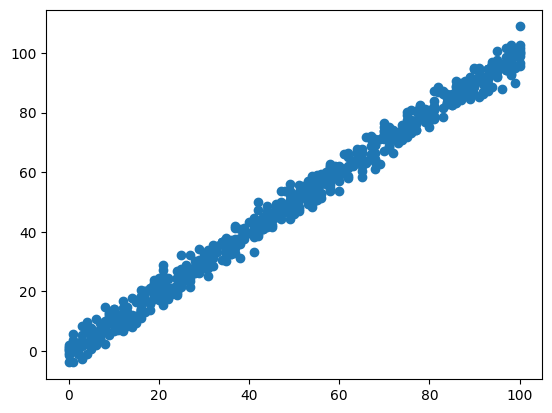

In [13]:
plt.plot(data.x, data.y, 'o')

### Splitting the dataset into training set and test set

In [14]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)
 
# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

### Training The model

In [15]:
# Train the model using scikit learn LinearRegression Class
model = LinearRegression()
model = model.fit(train_input, train_output)

### Predicting on Testset

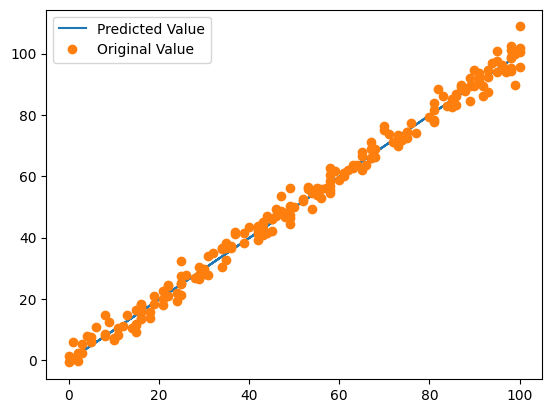

In [16]:
# Predict the values on Testset and Compare the results
test_pred = model.predict(test_input)
plt.plot(test_input, test_pred, label="Predicted Value")
plt.plot(test_input, test_output,'o', label="Original Value", )
plt.legend()
plt.show()

### 2. Linear Regression using Mathematical Formula

##### N.B. : Please follow this [Derivation](https://www.youtube.com/watch?v=ewnc1cXJmGA) video for the derivation of the formula

The final formulas for Linear Regression:  
<center>
    \[ y = \beta_0 + \beta_1x \]
    Then,
    \[ \beta_0 = \overline{Y} - \beta_1\overline{X}\]
    \[ \beta_1 = \frac{\sum_{i=1}^{n} (X_i-\overline{X})(Y_i-\overline{Y})}{\sum_{i=1}^{n} (X_i-\overline{X})^2} \]
</center>
    Where,  <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; n = number of datapoints <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\overline{Y}$ = Average value of y = $\frac{\sum_{i=1}^{n}y_i}{n}$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\overline{X}$ = Average value of x = $\frac{\sum_{i=1}^{n}x_i}{n}$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\beta_1$ = slope of best fit line <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\beta_0$ = intercept of best fit line <br>
    
    
    

#### Let's Make a Linear Regression Class with the help of above formula

In [17]:
class LinearRegressionFormula:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, x, y):
        n = len(x) # number of datapoints
        mean_x = sum(x)/n
        mean_y = sum(y)/n

        numerator = 0
        denominator = 0
        for i in range(n):
            numerator += (x[i]-mean_x)*(y[i]-mean_y)
            denominator += (x[i]-mean_x)**2

        
        self.slope = numerator/denominator
        self.intercept = mean_y - self.slope*mean_x

        return self

    def predict(self, x):
        if self.slope is None or self.intercept is None:
            raise ValueError("Model not fitted. Call fit() first.")

        return [self.slope * xi + self.intercept for xi in x]

        

### Training The model

In [18]:
# Train the model
model_F = LinearRegressionFormula()
model_F = model.fit(train_input, train_output)

### Predicting on Testset

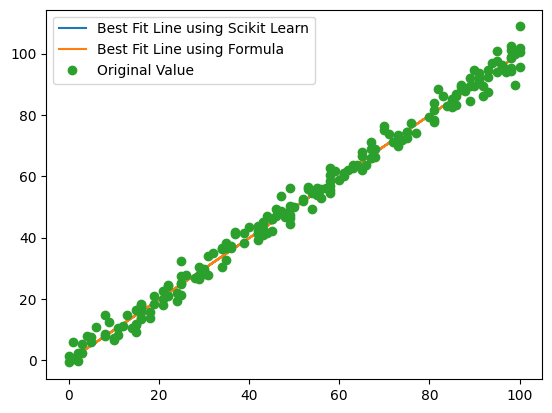

In [19]:
# Predict the values on Testset and Compare the results
test_pred_F = model.predict(test_input)
plt.plot(test_input, test_pred, label="Best Fit Line using Scikit Learn")
plt.plot(test_input, test_pred_F, label="Best Fit Line using Formula")
plt.plot(test_input, test_output,'o', label="Original Value", )
plt.legend()
plt.show()

__Result__ : As we can see from the above graph that best fit line of the Scikit learn library and Formula overlaps

# TODO : Linear Regression using Gradient Descent